In [ ]:
# Instalando as bibliotecas e atualizando 
!pip install pyDOE
!pip install -U seaborn
# Import MEF 1D Algorithm
!pip install -i https://test.pypi.org/simple/ FINITO-FEM-TOOLBOX


In [30]:
from FINITO_FEM_TOOLBOX import MEF1D
from RASD_TOOLBOX import *
import numpy as np
import pandas as pd

In [49]:
P1 = ['NORMAL', 10000, 1000]
P2 = ['NORMAL', 120000, 4000]
POP = [100]

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 1,
        'D': 2,
        'VARS': [P1, P2],
        'MODEL': 'MCS'}

In [50]:
def OBJ(X):
    P1 = X[0]
    P2 = X[1]

    FRAME_00 = {
    "TYPE_ELEMENT": 0,
    "TYPE_SOLUTION": 0,
    "N_NODES": 26,
    "N_MATERIALS": 1,
    "N_SECTIONS": 1,
    "N_ELEMENTS": 27,
    "N_DOFPRESCRIPTIONS": 6,
    "N_DOFLOADED": 24,
    "N_DOFSPRINGS": 0,
    "COORDINATES": #X,Y
    np.array([
    [0.0,0.0],
    [5.25,0.0],
    [0.0,3.0],
    [0.75,3.0],
    [1.5,3.0],
    [2.25,3.0],
    [3.0,3.0],
    [3.75,3.0],
    [4.5,3.0],
    [5.25,3.0],
    [0.0,6.0],
    [0.75,6.0],
    [1.5,6.0],
    [2.25,6.0],
    [3.0,6.0],
    [3.75,6.0],
    [4.5,6.0],
    [5.25,6.0],
    [0.0,9.0],
    [0.75,9.0],
    [1.5,9.0],
    [2.25,9.0],
    [3.0,9.0],
    [3.75,9.0],
    [4.5,9.0],
    [5.25,9.0]]),

    "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
    np.array([
    [0,2,0,0,0,0],
    [1,9,0,0,0,0],
    [2,3,0,0,0,0],
    [3,4,0,0,0,0],
    [4,5,0,0,0,0],
    [5,6,0,0,0,0],
    [6,7,0,0,0,0],
    [7,8,0,0,0,0],
    [8,9,0,0,0,0],
    [2,10,0,0,0,0],
    [9,17,0,0,0,0],
    [10,11,0,0,0,0],
    [11,12,0,0,0,0],
    [12,13,0,0,0,0],
    [13,14,0,0,0,0],
    [14,15,0,0,0,0],
    [15,16,0,0,0,0],
    [16,17,0,0,0,0],
    [10,18,0,0,0,0],
    [17,25,0,0,0,0],
    [18,19,0,0,0,0],
    [19,20,0,0,0,0],
    [20,21,0,0,0,0],
    [21,22,0,0,0,0],
    [22,23,0,0,0,0],
    [23,24,0,0,0,0],
    [24,25,0,0,0,0]]),

    "MATERIALS": #YOUNG,POISSON,DENSITY,THERMAL COEFFICIENT
    np.array([[200E9, 0.30,1,1E-8]]),
    "SECTIONS": #AREA,INERTIA 1,INERTIA 2,X GC,Y GC
    np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
    "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
    np.array([[0,0,0],
    [0,1,0],
    [0,2,0],
    [1,0,0],
    [1,1,0],
    [1,2,0]]),
    "ELEMENT LOADS": None,
    "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
    np.array([
    [2,1,-P1,0],
    [3,1,-P1,0],
    [4,1,-P1,0],
    [5,1,-P1,0],
    [6,1,-P1,0],
    [7,1,-P1,0],
    [8,1,-P1,0],
    [9,1,-P1,0],
    [10,1,-P1,0],
    [11,1,-P1,0],
    [12,1,-P1,0],
    [13,1,-P1,0],
    [14,1,-P1,0],
    [15,1,-P1,0],
    [16,1,-P1,0],
    [17,1,-P1,0],
    [18,1,-P1,0],
    [19,1,-P1,0],
    [20,1,-P1,0],
    [21,1,-P1,0],
    [22,1,-P1,0],
    [23,1,-P1,0],
    [24,1,-P1,0],
    [25,1,-P1,0]]),
    "SPRINGS": None}    

    FRAME_00_RESULTS = MEF1D(DICTIONARY = FRAME_00)
    FRAME_00_BAR_0 = FRAME_00_RESULTS[0]
    AXIAL_FORCE_LIST_BAR_0 = FRAME_00_BAR_0['N']
    N = AXIAL_FORCE_LIST_BAR_0[5]
    
    #print(FRAME_00_RESULTS)
    #print(FRAME_00_RESULTS[0])
    
    S_1 = np.abs(N)
    R_1 = P2
    
    # STATE LIMIT FUNCTION
    G_0 = R_1 - S_1
    R = [R_1] 
    S = [S_1] 
    G = [G_0]
    return R, S, G

In [51]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)
DADOS = RESULTS_TEST[0]['TOTAL RESULTS']

In [52]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,R_0,S_0,G_0,I_0
0,9921.691489,117213.460048,117213.460048,119052.0,-1838.539952,0.0
1,11338.774424,118799.099437,118799.099437,136056.0,-17256.900563,0.0
2,9691.185645,117813.849359,117813.849359,116292.0,1521.849359,1.0
3,9827.440217,125727.937855,125727.937855,117924.0,7803.937855,1.0
4,9074.145749,110777.397091,110777.397091,108888.0,1889.397091,1.0
...,...,...,...,...,...,...
95,9023.268489,124151.847771,124151.847771,108276.0,15875.847771,1.0
96,9260.068423,117829.283296,117829.283296,111120.0,6709.283296,1.0
97,10967.144018,118260.765496,118260.765496,131604.0,-13343.234504,0.0
98,10265.002539,125003.482729,125003.482729,123180.0,1823.482729,1.0


C:\Users\Donizetti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


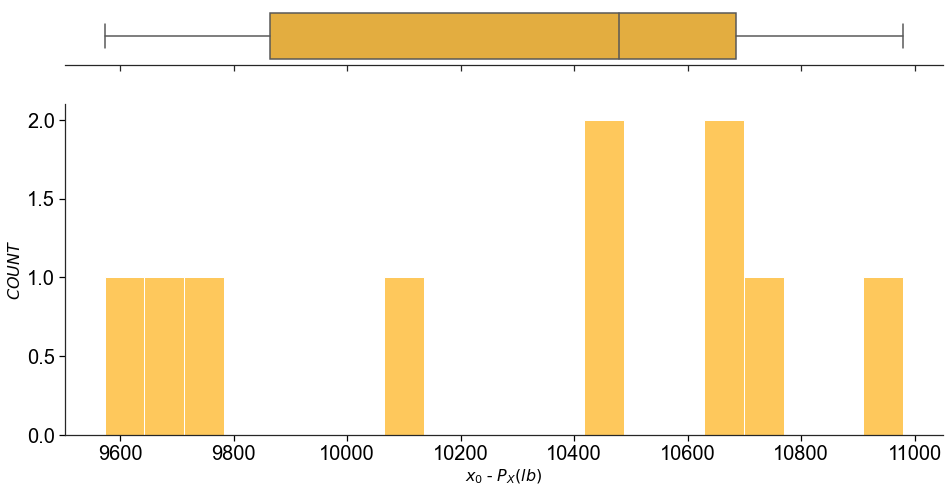

In [31]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

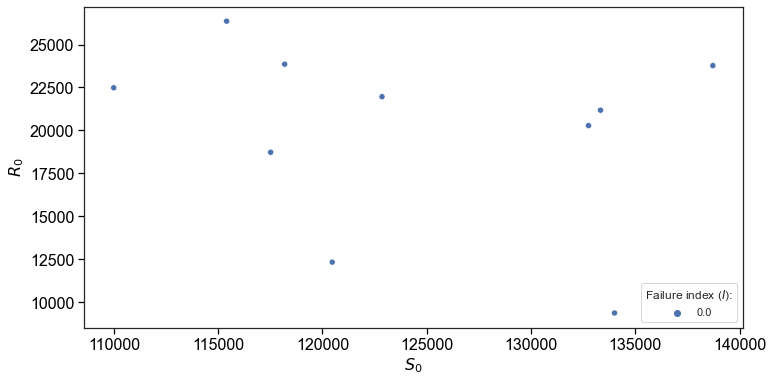

In [38]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

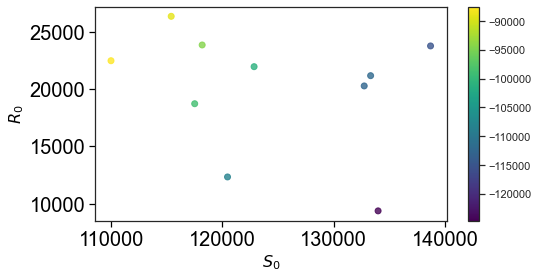

In [39]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

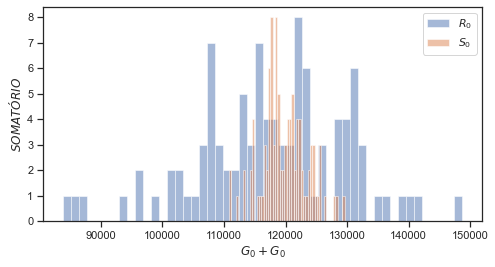

In [53]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0 + G_0$',
                    'Y AXIS LABEL': '$SOMATÓRIO$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

(array([1., 1., 1., 0., 0., 0., 0., 1., 0., 2., 0., 1., 0., 2., 2., 1., 1.,
        3., 7., 3., 2., 2., 5., 3., 7., 4., 4., 3., 3., 8., 6., 1., 3., 0.,
        4., 4., 6., 3., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.]),
 array([ 83808.  ,  85106.16,  86404.32,  87702.48,  89000.64,  90298.8 ,
         91596.96,  92895.12,  94193.28,  95491.44,  96789.6 ,  98087.76,
         99385.92, 100684.08, 101982.24, 103280.4 , 104578.56, 105876.72,
        107174.88, 108473.04, 109771.2 , 111069.36, 112367.52, 113665.68,
        114963.84, 116262.  , 117560.16, 118858.32, 120156.48, 121454.64,
        122752.8 , 124050.96, 125349.12, 126647.28, 127945.44, 129243.6 ,
        130541.76, 131839.92, 133138.08, 134436.24, 135734.4 , 137032.56,
        138330.72, 139628.88, 140927.04, 142225.2 , 143523.36, 144821.52,
        146119.68, 147417.84, 148716.  ]),
 <BarContainer object of 50 artists>)

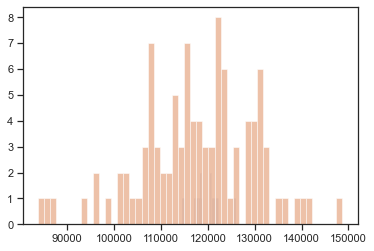

In [56]:
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)